In [1]:
from pyiron import Project
from wmaee.codes.pyiron.pyiron_CHGNet_job import CHGNet
import matplotlib.pyplot as plt

pr = Project('test_CHGNet')

In [2]:
job = pr.create_job(job_type=CHGNet, job_name='CHGNET_test_local', delete_existing_job=True)
job.structure = pr.create.structure.bulk('Mo')
job.fmax = 1e-4
job.run()

The job CHGNET_test_local was saved and received the ID: 864


In [3]:
remote = pr.create_job(job_type=CHGNet, job_name='CHGNET_test_remote', delete_existing_job=True)
remote.structure = pr.create.structure.bulk('Al')
remote.fmax = 1e-4
remote.server.queue = 'p12'
remote.run(run_mode='queue')

The job CHGNET_test_remote was saved and received the ID: 865


/opt/conda/envs/pyiron/lib/python3.11/site-packages/pysqa/ext/remote.py:413: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 2/2 [00:00<00:00, 306.04it/s]


Queue system id:  13512


/opt/conda/envs/pyiron/lib/python3.11/site-packages/pysqa/ext/remote.py:413: UserWarning: 2024-11-22 00:29:26,916 - pyiron_log - INFO - job: CHGNET_test_remote id: 865, status: initialized, submitted: queue id 13512

  warnings.warn(stderr.read().decode())


In [8]:
remote.run(run_mode='queue')

100%|██████████| 1/1 [00:00<00:00, 78.98it/s]


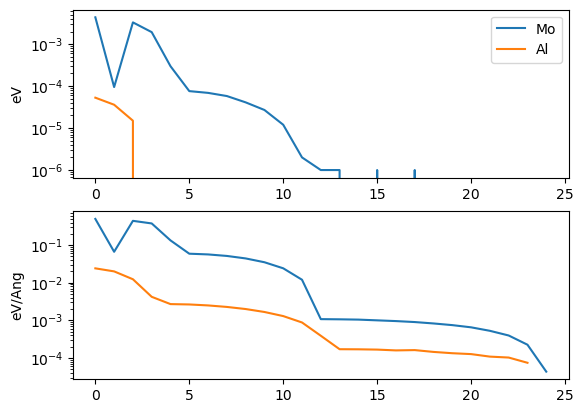

In [9]:
fig, ax = plt.subplots(2,1)
ax[0].plot(job.output.energy_pot-job.output.energy_pot[-1], label='Mo')
ax[0].plot(remote.output.energy_pot-remote.output.energy_pot[-1], label='Al')
ax[1].plot(job['output/generic/max_force'])
ax[1].plot(remote['output/generic/max_force'])
ax[0].legend()
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_ylabel('eV')
ax[1].set_ylabel('eV/Ang')
plt.show()

In [10]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,864,finished,Mo,CHGNET_test_local,/CHGNET_test_local,/mnt/fileserver/dholec/,test_Amin/test_CHGNet/,2024-11-22 00:29:20.021012,2024-11-22 00:29:23.421428,3.0,dholec@workstationcms#1,CHGNet,0.1,None,None
1,865,finished,Al,CHGNET_test_remote,/CHGNET_test_remote,/mnt/fileserver/dholec/,test_Amin/test_CHGNet/,2024-11-22 00:29:23.452010,NaT,NaN,dholec@workstationcms#1#p12,CHGNet,0.1,None,None
